# COMP0142

# Assignment 1: Basic Mathematics & Python

## Introduction

In this assignment you will learn to:
1. Use Python numerical libraries (`pandas` and `numpy`) to load and manipulate data stored in an excel file;
2. Adapt existing code to suit a different purpose;
3. Understand an actual use case of matrix multiplication;
4. Understand the matrix multiplication as a transformation of points, and the geometric meaning of eigenvectors;
5. Gain an intuitive understanding of the multivariate normal distribution and its covariance matrix.

## Guidelines

- The structure of the code is given to you and you will need to fill in the parts corresponding to each question. 
- You will have to submit the completed notebook in the Jupyter notebook format: `.ipynb`.
- Do not modify/erase other parts of the code if you have not been given specific instructions to do so.
- When you are asked to insert code, do so between the areas which begin:
  
  `##########################################################`
  
  `# TO_DO`
  
  `# [your code here]`
   
   And which end:
   
  `# /TO_DO
   ##########################################################`


- When you are asked to comment on the results you should give clear and comprehensible explanations. Write the comments in a 'Code Cell' with a sign `#` at the beginning of each row, and in the areas which begin:

  `# [INSERT YOUR ANSWER HERE]`

## Initialisation
Please execute the following cell to initialise this notebook. It will load the packages necessary for the assignment but please do not change it.

**Note:** If you see some warnings like: *"... RuntimeWarning: numpy.dtype size changed ..."*. Don't panic! It is safe to simply ignore them.

In [1]:
# PLEASE DO NOT CHANGE THIS CELL

# Initialisation:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
%matplotlib notebook

# Part A: Choosing monitors based on specifications [55 marks]

## Background:

Assume we have a $m \times n$ matrix $\mathbf{A}$, with elements $\{A_{ij}\}_{i=1,j=1}^{m, n}$, and a $n \times l$ matrix $\mathbf{B}$, with elements $\{B_{ij}\}_{i=1,j=1}^{n, l}$, then the elements of their product, $\mathbf{C}=\mathbf{A}\mathbf{B}$, are defined by the following equation:

$$ C_{ij} = \sum_{k} A_{ik} B_{kj}$$

There are several different ways to understand this equation. One practical view point is illustrated as follows: 

Assume that the matrix $\mathbf{B}$ is viewed as $l$ column vectors $\{b_j\}_{j=1}^l$ concatenated together horizontally. Each vector $b_j = [B_{1j}, B_{2j}, \cdots B_{nj}]^T$ represents all features of a data point:

$$ \mathbf{B} = [b_1, b_2, \cdots, b_l] = \left[\begin{array}{cccc}
B_{11} & B_{12} & \dots & B_{1l} \\
B_{21} & B_{22} & \dots & B_{2l} \\
\vdots & \vdots & \ddots & \vdots \\
B_{n1} & B_{n2} & \dots & B_{nl} \\
\end{array}\right]$$

Similarly, assume that the matrix $\mathbf{A}$ is viewed as $m$ row vectors $\{{a_i}^T\}_{i=1}^m$ concatenated together vertically, where ${a_i}^T = [A_{i1}, A_{i2}, \cdots A_{in}]$:

$$ \mathbf{A} = [a_1, a_2, \cdots, a_m]^T = \left[\begin{array}{c}
a_{1}^T \\
a_{2}^T \\
\vdots \\
a_{m}^T \\
\end{array}\right] = \left[\begin{array}{cccc}
A_{11} & A_{12} & \dots & A_{1n} \\
A_{21} & A_{22} & \dots & A_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
A_{m1} & A_{m2} & \dots & A_{mn} \\
\end{array}\right]$$

Each vector ${a_i}^T = [A_{i1}, A_{i2}, \cdots, A_{in}]$ can be viewed as containing many *weights* which will be used to multiply the entries in $b_j$. Thus the output of the matrix multiplication, $C_{ij}$, can be viewed as the weighted sum $\sum_k A_{ik} B_{kj}$ of the feature vector $b_j$, where the weights are determined by $a_i$.

## Task:

In this section, you are provided with an excel sheet containing specifications of monitors available on https://www.scan.co.uk/. You will be guided to give recommendations of monitors based on this excel sheet. It should be noted that the data in this excel sheet is not complete and might be out-of-date (it was collected on 14th December, 2018).

The excel sheet contains the technological specifications of several monitors, e.g. prices, screen size. Each row pertains to a monitor and each column contains the data for a specific feature. You will need to:
1. Load the excel sheet into a `pandas.DataFrame`.
2. Use `pandas` to replace all the raw data inside this excel sheet with numerical scores for each feature of each monitor.
3. Convert this DataFrame into a `numpy.array` and transpose it. The result is a matrix which plays the role of the matrix $\mathbf{B}$ mentioned above.
4. Fill in the entries of a matrix $\mathbf{A}$, such that its row vectors ${a_i}^T$ are the weights which will be used to multipliy the entries of the column vectors $b_j$ of $\mathbf{B}$.
5. Calculate the matrix multiplication $\mathbf{C}=\mathbf{A}\mathbf{B}$, and find the column vector $b_j$ which gives the highest score when multiplied with $a_i$.

### _Question 1 [5 marks]_

Please load the excel sheet named `data.xlsx` (provided in the same folder) into a pandas DataFrame variable called `df`

**Tip:** Google "pandas load excel"

In [2]:
#######################################################
# TO_DO
# [your code here]

#Puts the data in the excel sheet into a dataframe
df= pd.read_excel('data.xlsx')


# /TO_DO
########################################################

You can view the DataFrame here using Jupyter's excellent built-in previewer.

In [3]:
df #just execute this to view the dataframe

,Screen Size,Edition,Panel Type,Panel Coating,Panel Finish,Touchsceen,Backlight,Pitch Size,Curvature,Adaptive Frame-rate Technology,...,3D Support,Anti-Theft Features,Included Accessories,Monitor Colour,Dimensions (with stand),Dimensions (without stand),Weight (with Stand),Brand,Price,SN
0,23.0,ProLite,IPS,NaN,NaN,No,LED,0.265 x 0.265,NaN,NaN,...,No,NaN,{},Black,532.5 x 387.5 x 180 mm (WxHxD),NaN,NaN,IIYAMA,120.00,"ProLite XU2390HS-B1 23"" LED"
1,23.0,VC239H,IPS,NaN,NaN,No,NaN,0.2652 mm,NaN,NaN,...,No,NaN,{},Black,533.2 x 383.17 x 199.55 mm (WxHxD),533.2 x 383.17 x 45.75 mm (WxHxD),NaN,ASUS,128.00,23 inch VC239H Full HD IPS
2,22.5,ProLite XU2385WSU-B1,IPS,NaN,Matte,No,LED,0.254 x 0.248,NaN,NaN,...,No,Kensington-lock Ready,"{'DisplayPort Cable': 1, 'Power Cable': 1, 'US...",Black,499 x 396 x 180 (WxHxD),NaN,4 kg,IIYAMA,130.00,"23"" WUXGA IPS"
3,23.0,XUB2390HS,AH-IPS,NaN,NaN,No,LED,0.265,NaN,NaN,...,No,NaN,{},Black,532 x 516 x 230 mm (WxHxD),532 x 386 x 230 mm (WxHxD),5.4 kg,IIYAMA,150.00,XUB2390HS-B1 23
4,22.5,ProLite XUB2385WSU-B1,IPS,NaN,Matte,No,LED,0.254 x 0.248,NaN,NaN,...,No,Kensington-lock Ready,"{'DisplayPort Cable': 1, 'Power Cable': 1, 'US...",Black,499 x 385 ~ 515 x 230 (WxHxD),NaN,4 kg,IIYAMA,150.50,"23"" WUXGA IPS"
5,23.0,P2317H,IPS,Anti-Glare with 3H Hardness,NaN,No,LED,0.265,NaN,NaN,...,No,NaN,{},Black,532 x 357 - 487 x 180 (WxHxD),532 x 315.9 x 50.3 (WxHxD),3.06 kg,DELL,154.00,"P2317H 23"" IPS LED"
6,23.0,NaN,IPS,NaN,NaN,No,LED,NaN,NaN,NaN,...,No,NaN,{},Silver,522.2 x 392.2 x 207.2 mm (WxHxD),NaN,NaN,ASUS,165.00,"MX239H 23"" IPS"
7,24.0,ProLite E2483HS,TN,NaN,Matte,No,WLED,0.277 x 0.277 mm,NaN,NaN,...,No,Kensington-lock Ready,"{'Audio Cable': 1, 'HDMI Cable': 1, 'Power Cab...",Black,565.5 x 412 x 203 mm (WxHxD),NaN,3.4 kg,IIYAMA,109.00,"ProLite 24"" Full HD 1ms 75Hz Gaming"
8,24.5,GL2580H,TN,NaN,NaN,No,LED,0.311 mm,NaN,NaN,...,No,Kensington-lock Ready,"{'HDMI Cable': 1, 'Power Cable': 1}",Black,557.49 x 426.33 x 175.11 mm (WxHxD),557.49 x 332.08 x 49.7 mm (WxHxD),4.4 kg,BENQ,118.00,"24.5"" Full HD 1ms ZeroFrame Gaming"
9,24.0,VS248HR,TN,NaN,NaN,No,LED,0.2768 mm,NaN,NaN,...,No,NaN,{},Black,573.2 x 412.3 x 205.5 mm (WxHxD),573.2 x 346.3 x 45.7 mm (WxHxD),4.1 kg,ASUS,119.63,"VS248HR 24"" Full HD 1ms Gaming"


However, the excel sheet contains many columns, some of which are not useful for this analysis. 

### _Question 2 [5 marks]_

Please replace the DataFrame `df` with a new one which only includes the interesting columns defined below: 

**Tips:** 

1. See *Subset Variables* inside your cheat sheet.
2. Since you might make mistakes and therefore corrupt the original data several times, then to avoid the need to re-run the whole notebook in order to reload the data, please consider either:
    1. Creating a random DataFrame and experimenting on it before changing the actual data, or;
    2. Making a fresh new copy of the data before processing it, i.e.:

       `original_df = df.copy()`

       and later recovering it if needed by:

       `df = original_df.copy()`

In [4]:
# PLEASE DO NOT CHANGE THIS CELL

original_df = df.copy() # keep a copy of the original DataFrame, which can be used later.
interesting_columns = ['Screen Size', 'Panel Type', 'Adaptive Frame-rate Technology',
                       'Resolution', 'Refresh Rate', 'Response Time', 'Brightness', 
                       'Speakers', 'Price']

In [5]:
#######################################################
# TO_DO
# [your code here]

#Creates a new dataframe with only columns inside interesting_columns
df= df[interesting_columns]

# /TO_DO
########################################################

Then, please replace all the entries for the column "*Panel Type*" with a score. There are three steps required:

### _Question 3 [5 marks]_

Step 1. Please replace the entries in this column of 'NaN' (not a number) values with 'LED'.

**Tip:** Check out section *Handling Missing Data* in the Python cheat sheet.

In [6]:
#######################################################
# TO_DO
# [your code here]
#Fills all NaN values in Panel Type by LED
df=df.fillna({'Panel Type':'LED'})
# /TO_DO
########################################################

### _Question 4 [5 marks]_ 

Step 2. Please define a function which returns a score for an input panel type according to the following table:

| Panel Type      | Score|
|-----------------|-----|
| IPS             | 1   |
| AH-IPS          | 1.5 |
| TN              | 0.5 |
| VA              | 0.9 |
| SVA             | 0.9 |
| AMVA            | 0.9 |
| LED             | 0.2 |
| IPS, Anti-Glare | 1.5 |

In [7]:
# ADD AN EXCEPTION HERE BEFORE SUBMISSION
def score_panel_type(panel_type):
    '''
    A function that takes in a panel type and checks if it can be converted to a score, if it can, converts it to a score, if not
    returns
    Input: panel_type String
    Output: panel_score float
    '''
    #######################################################
    # TO_DO
    conversion={'IPS':1 , 'AH-IPS':1.5, 'TN':0.5, 'VA':0.9, 'SVA':0.9, 'AMVA':0.9, 'LED':0.2, 'IPS, Anti-Glare':1.5}
    if  panel_type in conversion:
        panel_score= conversion[panel_type]
        return panel_score
    else:
        return
    # /TO_DO
    ########################################################

### _Question 5 [5 marks]_

Please replace all the entries for the column "*Panel Type*" with a score, using the function you have defined above.

**Tip:** See *Summarize Data* inside the Python cheat sheet.

In [8]:
#######################################################
# TO_DO
# [your code here]
#Applies the function to convert the panel type into a score
df['Panel Type'] = df['Panel Type'].apply(score_panel_type)

# /TO_DO
########################################################

Similarly, we would like to replace the remaining data inside `df` each with a numerical score. To save you time, the excel sheet with all data replaced by numerical scores are provided in the file `data_scored.xlsx`. This excel sheet contains a table of scores for every feature of each monitor. The rows correspond to different monitors and the columns are ordered by different features.

Now you are asked to load this excel sheet into a `numpy.array`, such that it plays the role of $\mathbf{B}$ as mentioned in the **Background** section.

### _Question 6 [5 marks]_  

Please load the excel sheet `data_scored.xlsx` into a `pandas.DataFrame` called `df`, then extract its contents into a `numpy.array` called `brr`.

**Tip:** Each `DataFrame` has an attribute named `values`, which contains its content as a `numpy.array`. To read more about it, please execute the following line:

In [9]:
?pd.DataFrame.values

In [10]:
#######################################################
# TO_DO
# [your code here]
#Puts the data in the excel sheet into a dataframe
df = pd.read_excel('data_scored.xlsx')
#Creates a numpy array of the values inside the dataframe
brr = df.values
# /TO_DO
########################################################

### _Question 7 [5 marks]_   

Please replace the content of `brr` with a transposition of itself. This way, the array `brr` contains all the features of a specific monitor as a column vector (i.e. $b_j$ in the section **Background**):

| Example:                        | monitor 1 | monitor 2 | monitor 3 | ... |
|---------------------------------|-----------|-----------|-----------|-----|
| index in the original dataframe | 6         | 36        | 37        |     |
| score for "Screen Size"         | 0.9       | 0.9       | 0.9       |     |
| score for "Panel Type"          | 0.9       | 0.9       | 0.9       |     |
| score ...                       | 0.9       | 0.9       | 0.9       |     |

In [11]:
#######################################################
# TO_DO
# [your code here]
#Transposes brr
brr=brr.T

# /TO_DO
########################################################

### _Question 8 [5 marks]_ 

Please create a new `numpy.array` called `arr`, which contains the weights playing the role of matrix $\mathbf{A}$ in the **Background** section. The specific weights are:

| Scores for:                    | Screen Size | Panel Type | Adaptive Frame-rate Technology | Resolution | Refresh Rate | Response Time | Brightness | Speakers | Price |
|--------------------------------|-------------|------------|--------------------------------|------------|--------------|---------------|------------|----------|-------|
| Scenario: gaming               | 1.0         | 1.0        | 3.0                            | 1.0        | 3.0          | 3.0           | 1.0        | 0.0      | 0.5   |
| Scenario: home studio          | 3.0         | 3.0        | 1.0                            | 3.0        | 1.0          | 1.0           | 3.0        | 3.0      | 1.0   |
| Scenario: home studio (under budget) | 3.0         | 3.0        | 1.0                            | 3.0        | 1.0          | 1.0           | 3.0        | 3.0      | 10.0  |

**Note:** In this case, the row label $i$ of the matrix $\mathbf{A}$, with elements $\{A_{ij}\}_{i=1,j=1}^{m, n}$, labels different scenarios: *"gaming"*, *"home studio"*, and *"home studio (under budget)"*.

In [12]:
#######################################################
# TO_DO
# [your code here]

#Creates an array that gives weights to each column for gaming, home studio, home studio (under budget)
arr = np.array([[1,1,3,1,3,3,1,0,0.5],[3,3,1,3,1,1,3,3,1],[3,3,1,3,1,1,3,3,10]])

# /TO_DO
########################################################

### _Question 9 [5 marks]_ 

Please multiply the matrix `arr` by `brr` and save the result into `crr`, i.e. `crr=arr*brr`.

**Tip:** Matrix multiplication is done by the `dot` function of `numpy.array`.

In [13]:
#######################################################
# TO_DO
# [your code here]

#Multiplies arr with brr
crr= arr.dot(brr)

# /TO_DO
########################################################

### _Question 10 [5 marks]_  

Please find the monitor which gives the maximal score for all three scenarios:

**Tip 1:** 
The function `numpy.max` only finds the maximal value of an array. To find the position inside this array having the maximal value, use the `argmax` function of a `numpy.array`. To find the position of maximal values for each rows individually, use `argmax(axis=1)`, which means "along the 1st axis (i.e. the columns)".

For example:

In [14]:
# PLEASE DO NOT CHANGE THIS CELL

example = np.array([[1,2,3],[3,5,1]])
print(example.max())
print(example.argmax())
print(example.argmax(axis=1))

5
4
[2 1]


In [15]:
#######################################################
# TO_DO
# [your code here]

#Gets the location of the maximum scoring computer
loc=crr.argmax(axis=1)

#Prints the maximum scoring computer for gaming, home studio and home studio(under budget)
original_df[['Brand','SN']].iloc[loc]

# /TO_DO
########################################################

,Brand,SN
48,AOC,"25"" G2590PX 144Hz Full HD FreeSync Gaming"
56,AOC,Q2577PWQ 25 Inch QHD
16,ACER,"Nitro VG240Y 24"" Full HD 1ms IPS FreeSync Gaming"


**Tip 2:** Having found the position of maximal scores in the array `crr`, you should use this information and look up the original excel file `data.xlsx` to find its *"Brand"* and serial number (*"SN"*).

### _Question 11 [5 marks]_ 

Please type below the monitors' *"Brand"* and serial number (*"SN"*) which you found to have the maximal scores for each of the three scenarios:

**For gaming**:

- Brand:

In [16]:
# [INSERT YOUR ANSWER HERE]

# AOC 

- SN:

In [17]:
# [INSERT YOUR ANSWER HERE]

# 25" G2590PX 144Hz Full HD FreeSync Gaming

**For Home Studio**:

- Brand:

In [18]:
# [INSERT YOUR ANSWER HERE]

# AOC

- SN:

In [19]:
# [INSERT YOUR ANSWER HERE]

# Q2577PWQ 25 Inch QHD

**For Budget Home Studio**:

- Brand:

In [20]:
# [INSERT YOUR ANSWER HERE]

# ACER

- SN:

In [21]:
# [INSERT YOUR ANSWER HERE]

# Nitro VG240Y 24" Full HD 1ms IPS FreeSync Gaming

# Part B: Visualising Matrix Transformation [25 marks]
In this part, you are asked to use plotting to examine the properties of a matrix. The matrix is defined as follows:

In [22]:
# PLEASE DO NOT CHANGE THIS CELL

mat = np.array([[0.9 , 0.47],
       [0.47, 0.9 ]])

Three vectors and many points on a circle are specified below. You will be asked to apply the matrix `mat` (defined above) to them, and to visualise their transformation using `matplotlib` and a function which has already been defined for you.

In [23]:
# PLEASE DO NOT CHANGE THIS CELL

# ------------------------------------------------- 
# Definition of vectors and points
# -------------------------------------------------
# three vectors
vec1 = np.array([[1/np.sqrt(2)],
                 [1/np.sqrt(2)]])
vec2 = np.array([[1/np.sqrt(2)],
                 [-1/np.sqrt(2)]])
vec3 = np.array([[1], 
                 [0]])
# the points on a circle. In the format: [[x1,x2,x3,...],[y1,y2,y3,...]]
x = np.linspace(-1,1)
y_upper = np.sqrt(1-x**2)
y_lower = -y_upper
circle = np.vstack((np.append(x,x)[np.newaxis, :], np.append(y_upper, y_lower)[np.newaxis,:]))

### _Question 12 [5 marks]_  

Please multiply the matrix and the three vectors, and store the results into new variables named `transformed_vectori` (where `i` is the label of the vectors).

In [24]:
#######################################################
# TO_DO
# [your code here]
#Multiply the matrix with the vectors to transform them
transformed_vector1=mat.dot(vec1)
transformed_vector2=mat.dot(vec2)
transformed_vector3=mat.dot(vec3)
# /TO_DO
########################################################

The variable `circle` contains the points on a circle, in the format: `[[x1,x2,x3,...],[y1,y2,y3,...]]`, i.e. it contains coordinates of these points as column vectors. 

### _Question 13 [5 marks]_  

Please transform all the points on this circle using the matrix `mat`. Note that this could be done by simply multiplying the matrix `mat` with the $2\times n$ matrix `circle`. Please store the results into a new variable named `transformed_circle`.

In [25]:
#######################################################
# TO_DO
# [your code here]

#Multiplies the matrix with circle matrix
transformed_circle=mat.dot(circle)

# /TO_DO
########################################################

### _Question 14 [5 marks] _  

Please plot all three vectors, before and after the transformation, by completing the unfinished code cell below. Note that you should use different colours for different vectors to distinguish them. Available colours include: `"blue"`, `"green"`, `"red"`, `"cyan"`, `"magenta"`, `"yellow"`, `"black"`, `"grey"`, `"hotpink"`, and many more.

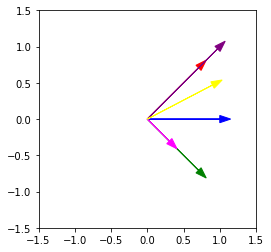

In [28]:
########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

fig, ax = plt.subplots(1)
ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1.5,1.5])
ax.set_aspect(aspect='equal')
def plot_a_vector(vector, color):
    vector = np.asarray(vector).flatten()
    ax.arrow(0,0, dx=vector[0], dy=vector[1], color=color, head_width=0.1)

plot_a_vector(vector=vec1, color='red')
plot_a_vector(vector=transformed_vector1, color='purple')
#
########################################################


#######################################################
# TO_DO
# [your code here]

#Plots the vectors along with transformed vectors
plot_a_vector(vec2,"green")
plot_a_vector(vec3,"blue")
plot_a_vector(transformed_vector2,"magenta")
plot_a_vector(transformed_vector3,"yellow")

# /TO_DO
########################################################

### _Question 15 [5 marks] _   

Similarly, please plot all points on the circle, before and after the transformation, by completing the unfinished code cell below. Note that you should use different colors for different vectors to distinguish them. Available colors have been mentioned before.

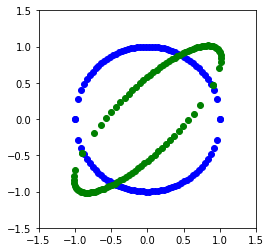

In [29]:
########################################################
# PLEASE DO NOT MODIFY THIS CODE SEGMENT

fig, ax = plt.subplots(1)
ax.set_aspect(aspect='equal')
ax.set_xlim([-1.5,1.5])
ax.set_ylim([-1.5,1.5])
ax.scatter(x=circle[0,:], y=circle[1,:], color='blue')
#
########################################################


#######################################################
# TO_DO
# [your code here]

#Plots a scatter graph of transformed cirle
ax.scatter(x=transformed_circle[0,:], y=transformed_circle[1,:], color='green')


# /TO_DO
########################################################

### _Question 16 [5 marks] _   

Now that you have visualised the transformation, please answer which vector(s) among the three vectors (`vec1`, `vec2`, and `vec3`) is(are) the eigenvector(s) of this matrix:

In [1]:
# [INSERT YOUR ANSWER HERE]

# vec1 and vec2
#Since after the matrix operation the eigenvectors are in the same direction, just different magnitudes

# Part C: Visualising the Multivariate Gaussian Distribution [20 marks]

In this section, you are asked to visualise multivariate normal (Gaussian) distributions and understand the meaning of the entries of the covariance matrix.

Provided below is a code cell which plots the contours of the probability density function of a multivariate normal distribution with:
$$\sigma_X = \sigma_Y=1,\, \text{Cov}(X,Y)=0,\, \mu_X = \mu_Y = 0$$

There are two functions defined there. The first is called `cov_mat`, which returns a correct covariance matrix of two random variables $X$ and $Y$ for given parameters:
* `sigmax`: $\sigma_X$, $X$'s standard deviation.
* `sigmay`: $\sigma_Y$, $Y$'s standard deviation.
* `covxy`: $\text{Cov}(X,Y)$, The covariance between $X$ and $Y$.

The second is called `get_xyz_for_covariance_mat`, which returns the required $x\sim X$, $y\sim Y$, and $z\sim Z$ points for `matplotlib`'s `contour` function to plot the contours.

##### Question 17 [5 marks]    

Please define a function called `plot_for_cov`, which accepts three parameters: `sigmax`, `sigmay`, and `covxy`. This function should plot the contour of the corresponding probability density function of multivariate normal distribution with zero means for $X$ and $Y$. 

**Note:** Code has been provided in the cell below which plots correctly the case where `sigmax=1`, `sigmay=1`, and `covxy=0`. You should adapt it into a function satisfying the requirement above.

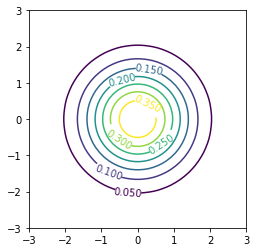

In [31]:
# PLEASE DO NOT CHANGE THIS CELL

def cov_mat(sigmax, sigmay, covxy):
    mat = np.array([[sigmax, covxy], [covxy, sigmay]]).astype(float)
    if np.isclose(np.linalg.det(mat), 0) or (not all(np.linalg.eigvalsh(mat) > 0)):
        raise ValueError('The specified covariance matrix is illegal: non positive definite.')
    return mat

def get_xyz_for_covariance_mat(mat):
    x = np.linspace(-3,3)
    y = np.linspace(-3,3)
    X, Y = np.meshgrid(x, y)
    def multivariate_normal(cov_matrix):
        det = np.linalg.det(cov_matrix)
        factor = 1/np.sqrt(2*np.pi*det)
        inv = np.linalg.inv(cov_matrix)
        return lambda x: np.exp(-0.5* x.dot(inv).dot(x.transpose())) * factor
    f = multivariate_normal(mat)
    Z = np.empty_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = f(np.array([X[i,j], Y[i,j]]))
    return X, Y, Z

# ----------------------------------------------------------
# Code provided to plot the case where sigmax=1, sigmay=1, and covxy=0. 
# ----------------------------------------------------------
fig, ax = plt.subplots()
X, Y, Z = get_xyz_for_covariance_mat(cov_mat(1, 1, 0))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_aspect(aspect='equal')

In [32]:
#######################################################
# TO_DO
# [your code here]

def plot_for_cov(sigmax, sigmay, covxy):
    '''
    Function that plots the contour of the probability
    density function of multivariate normal distribution with zero means for  XX  and  Y
    Input sigmax Float Standard deviation of X
    Input sigmay Float Standard deciation of Y
    Input covxy Float Covariance between X and Y
    Output Plots the probability density function
    '''
    fig, ax = plt.subplots()
    X, Y, Z = get_xyz_for_covariance_mat(cov_mat(sigmax, sigmay, covxy))
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_aspect(aspect='equal')

# /TO_DO
########################################################

### _Question 18 [5 marks] _ 

Please plot the contours of multivariate normal distributions with different covariance matrices assuming the mean values for $X$ and $Y$ are zero:
1. `cov_mat(1,1,0)`
2. `cov_mat(1.5,0.5,0)`
3. `cov_mat(1,1,0.5)`
4. `cov_mat(1,1,-0.5)`

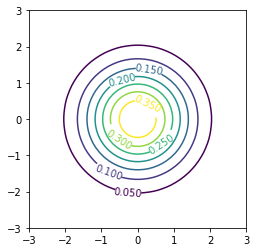

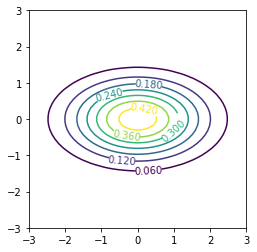

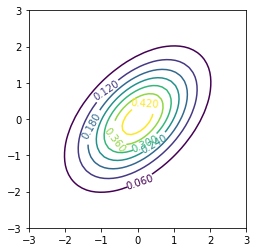

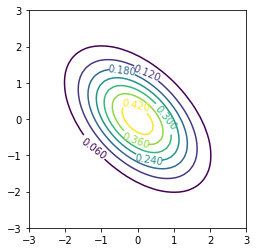

In [33]:
#######################################################
# TO_DO
# [your code here]

plot_for_cov(1,1,0)
plot_for_cov(1.5,0.5,0)
plot_for_cov(1,1,0.5)
plot_for_cov(1,1,-0.5)

# /TO_DO
########################################################

### _Question 19_

Now using intuitions gained from various plots above, please answer:

### _a) [5 marks]_
What is the meaning of $\text{Cov}(X,Y)$:

In [34]:
# [INSERT YOUR ANSWER HERE]

# It's magnitude represents how tilted the contours are, the direction of the tilt is determined by whether it is negative or
#positive like the gradient of the countours.

### _b) [5 marks]_ 
How are $X$ and $Y$ related when $\text{Cov}(X,Y)$ is positive or negative?

In [35]:
# [INSERT YOUR ANSWER HERE]

# When Cov(X,Y) is positive, there is a positive correlation between X and Y and when Cov(X,Y) is negative
#there is a negative correlation between X and Y